# 12 Useful Pandas Techniques to add to your Arsenal!!

## Introduction

If you are reading this article, I'm sure you love statistical modeling (or will start loving it if you're a begineer)! Not sure about you, but during my initial days with machine learning, I was too anxious to make a model that I didn't even took the pain of even opening my data file and just ran my first model. As expected, this almost never worked out and my compiler started throwing errors. On backtracking, I found the most common reasons - missing data, incorrect coding of values, nominal variables being treated as numeric because the finite values are integers, etc.

Data exploration and feature engineering are crucial for succssfully deriving actionable insights from data. In this article, I will share some tips and tricks using which this can be easily done using Pandas in Python. Python is gaining popularity and Pandas is one of the most popular tools for data handling in Python.

Note: We'll be using the dataset of the "Loan Prediction" problem from the Analytics Vidhya datahacks. Click here to access the dataset and problem statement. The data can be loaded into Python using the command:

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv", index_col="Loan_ID")
# test = pd.read_csv("test.csv", index_col="PassengerID")
print data.shape
data.columns

(614, 12)


Index([u'Gender', u'Married', u'Dependents', u'Education', u'Self_Employed',
       u'ApplicantIncome', u'CoapplicantIncome', u'LoanAmount',
       u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

## 1. Boolean Indexing

Useful for indexing a set of column using another set of columns. For instance, we can get a list of all women who are not graduate and got a loan using the following code.

In [2]:
data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


More: http://pandas.pydata.org/pandas-docs/stable/indexing.html

## 2. Iterating over rows of a dataframe

Although rarely used, but at times you may need to iterate through all rows. One common problem we face is nominal variables with numeric categories are treated as numerical by defauly by python. Also, there might be some numeric variable where some characters are entered in one of the rows and it'll be considered categorical by default. So it's generally a good idea to manually define the column types.

In [3]:
#Check current type:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle this issue is to create a csv file with column names and types. This way we can make a generic function to read the file and assign column data types. For instance, in this case I've defined a csv file datatypes.csv (download).

In [4]:
#Load the file:
colTypes = pd.read_csv('datatypes.csv')
print colTypes

              feature         type
0             Loan_ID  categorical
1              Gender  categorical
2             Married  categorical
3          Dependents  categorical
4           Education  categorical
5       Self_Employed  categorical
6     ApplicantIncome   continuous
7   CoapplicantIncome   continuous
8          LoanAmount   continuous
9    Loan_Amount_Term   continuous
10     Credit_History  categorical
11      Property_Area  categorical
12        Loan_Status  categorical


On loading this file, we can iterate through each row and assign the datatype from column 'type' to the variable name defined in 'feature' column.

In [5]:
#Iterate through each row and assign variable type.
# Note: astype is used to asign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['feature']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['feature']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


Now the credit history column is modified to 'object' type which is used for representing nominal variables in Pandas.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows

## 3. Apply Function

It is one of the most handy functions when it comes to playing with the data, specially creating new varaibles. As the name suggests, apply returns some value after passing each row/column of a dataframe through some function. The function can be both default or user-defined.

For instance, here it can be used to find the #missing values in each row and column.

In [6]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print data.apply(num_missing, axis=0)  #axis=0 defines that function is to be applied on each column

#Applying per row:
print "\nMissing values per row:"
print data.apply(num_missing, axis=1).head()  #axis=1 defines that function is to be applied on each column

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


Thus we get the desired result. Note: head() function is used in second output because it contains many rows. 

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply

# 4. Imputing missing files

'fillna()' is a very useful function handy in implementing very basic forms of imputation like updating missing values with the overall mean/mode/median of the column. Let's impute the 'Gender', 'Married' and 'Self_Employed' columns with there respective modes.

In [7]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

/Users/aarshay/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

This returns both mode and count. Remember that mode can be an array as there can be multiple values with high frequency. We will take the first one by default always using:

In [8]:
mode(data['Gender']).mode[0]

'Male'

Now we can fill the missing values and check using technique #3.

In [9]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Hence confirmed the missing values are imputed. Note: This is the most primitive forms of imputation. Other sophisticated techniques include modeling the missing values using some variables or using grouped averages (mean/mode/median). We'll take up the later next.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

## 5. Pivot Table

Pandas can be used to create MS Excel style pivot tables. For isntance, in this case a very key column is "LoanAmount" which has missing values. We can impute it using mean amount of each 'Gender', 'Married' and 'Self_Employed' group. The mean 'LoanAmount' of each group can be determined as:

In [10]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print impute_grps

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

## 6. MultiIndexing

If you notice the output of step #4, it has a peculiar property. Each index is made of a combination of 3 values! This is called MultuIndexing and it can be used to perform some operations really fast if used wisely. Continuing the example from #4, we have the values for each group but not they have to be imputed.

This can be done using the various techniques learned till now.

In [11]:
#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Note:
    1. Multi-index require tuple for defining groups of indices in loc statement. This a tuple used in function.
    2. The .values[0] suffix is required because by defualt a series element is returned which has an index not matching with that of the dataframe. So direct assignment gives an error.

# 7. Crosstab

This function can be used to get an initial "feel" of the data. We can validate some basic hypothesis. For instance, in this case "Credit_Histpry" is expected to affect the loan status significantly. This can be tested using a cross-tabulation as:

In [12]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


These are absolute numbers but percentages can be more intuitive in making some quick insights. We can do this using the apply function:

In [13]:
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1
1.0,0.204211,0.795789,1
All,0.312704,0.687296,1


Now it is clearly evident that people with a credit histpry have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 9% without credit histoty. 

But that's not it. It tells an iteresting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we'll be right 82+378=460 times out of 614 which is a whopping 75%! I won't blame you if you're wondering why the hell do we need statistical models. But trust me, increasing the accuracy by even 0.001% beyond this is a challenging ask.

Note: 75% is on train set. The test set will be slightly different but close.
Also, I hope this gives some intuition into why even a 0.05% increase in accuracy can result in jump of 500 ranks on a Kaggle leaderboard.

More: http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html

## 8. Merge DataFrames

Merging dataframes becomes essential when we have information coming from different sources which is to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let's define a dataframe as:

In [14]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


Now we can merge this information with the original dataframe as:

In [15]:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

Property_Area  rates
Rural          1000     179
Semiurban      5000     233
Urban          12000    202
Name: Credit_History, dtype: float64

The pivot table validates sucessful merge operation. Note that the 'values' argument is irrelevant here because we are simply counting the values.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html#pandas.DataFrame.merge

## 9. Sorting DataFrames

Pandas allows easy sorting based on multiple columns. This can be done as:

In [16]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0
LP002101,63337,0
LP001585,51763,0
LP001536,39999,0
LP001640,39147,4750
LP002422,37719,0
LP001637,33846,0
LP001448,23803,0
LP002624,20833,6667


Note: The Pandas "sort" function is now depricated and we should use "sort_values".

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

# 10. Plotting (Boxplot & Histogram)

Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlob separately is not necessary. It's just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

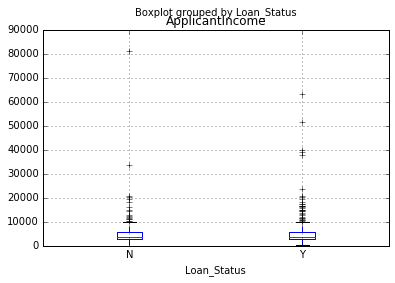

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d71ced0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d770b90>], dtype=object)

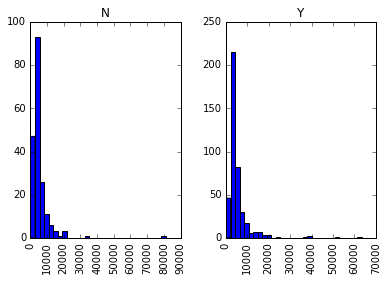

In [18]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html#pandas.DataFrame.hist | 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

## 11. Cut function for binning

Sometimes numerical values make more sense if clustered together. For example, if we're trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like "Morning", "Afternoon", "Evening", "Night", "Late Night". Modeling traffic this way will be more intuitive and will avoid overfitting minute details which practically make little sense.

Here I've defined a simple function which can be re-used for binning any variable fairly easily.

In [20]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
    
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
dtype: int64


More: http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html

# 12. Coding nominal data

Very often we come accross a case where we've to modify the categories of a nominal variable. This can be due to various reasons:
    1. Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal varialbes are mostly coded as 0---(n-1)
    2. Sometimes the same category might be represented in 2 ways. For eg temperature might be recorded as "High", "Medium", "Low", "H", "low". Here, both "High" and "H" refer to same category. Similarly, in "Low" and "low" there is only a difference of case.
    3. Some categories might have very low frequencies and its generally a good idea to combine them

Here I've defined a generic function which takes in input as a dictionary and codes the values using 'replace' function in Pandas

In [21]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#Coding LoanStatus as Y=1, N=0:
print 'Before Coding:'
print pd.value_counts(data["Loan_Status"])
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print '\nAfter Coding:'
print pd.value_counts(data["Loan_Status_Coded"])

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


Similar counts before and after proves the coding.

More: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html#pandas.DataFrame.replace

## End Notes:

In this article, we coverd various functions of Pandas which can make our life easy while performing data exploration and feature engineering. Also, we defined some generic functions which can be reused for acheiving similar objective on different datasets.

Also See: If you have any doubts pertaining to Pandas or Python in general, feel free to discuss with us.

Did you find the article useful? Do you use some better (easier/faster) techniques for performing the tasks discussed above? Do you think there are better alternatives to Pandas in Python? We'll be glad if you share your thoughts as comments below.